In [1]:
import wrangle_zillow as wr
import explore_zillow as ex
import evaluate_zillow as ev

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

Load in successful, awaiting commands...


In [2]:
# get data
df = wr.get_zillow_261()

CSV file found and loaded


In [3]:
# identify outliers
wr.outliers_zillow(df, 1.5)

Bedroomcnt: upper,lower (5.5, 1.5)
Bathroomcnt: upper,lower (4.5, 0.5)
Calculatedfinishedsquarefeet: upper,lower (3634.5, -169.5)
Taxvaluedollarcnt: upper,lower (1054062.125, -331364.875)
Yearbuilt: upper,lower (2016.5, 1908.5)
Taxamount: upper,lower (12233.329999999998, -3284.0299999999993)
Fips: upper,lower (6092.0, 6004.0)
Propertylandusetypeid: upper,lower (261.0, 261.0)
Parcelid: upper,lower (17651612.5, 8063540.5)
---


In [4]:
# clean data
df_clean = wr.wrangle_zillow(df)

Returning Zillow's Single Family Residential Homes from 2017
--------------------------------------------
Renamed columns for ease of use
NaN's removed - Percent Original Data Remaining: 99.0
Moved target column to index 0 for ease of assignment
Bed and year data types changed from float to integer
Changed FIPS code to actual county name
Outliers removed: Percent Original Data Remaining: 91.0
 Sqft <= 5,000 and > 0
 Property Taxes <= $12,233 and > 0
 Bathrooms <= 5 and > 0
 Bedrooms <= 6 and > 0
 Built after 1908
 Assessed Worth <= $1,054,062 and > 0
Encoded County column and renamed encoded columns for readability
DataFrame is clean and ready for exploration :)


In [5]:
# look at data
df_clean.head()

,assessed_worth,bed,bath,sqft,year,property_taxes,orange,ventura
4,296425.0,4,2.0,3633.0,2005,6941.39,0,0
6,847770.0,3,4.0,1620.0,2011,10244.94,0,0
7,646760.0,3,2.0,2077.0,1926,7924.68,0,0
18,169471.0,3,1.0,1244.0,1950,2532.88,0,0
19,233266.0,3,2.0,1300.0,1950,3110.99,0,0


In [6]:
# split data
train, validate, test = wr.split_zillow(df_clean)

Prepared DF: (1957985, 8)
Train: (1096471, 8)
Validate: (469917, 8)
Test: (391597, 8)


In [7]:
# prepare data for modeling
X_train, y_train, X_validate, y_validate, X_test, y_test = wr.x_y_train_validate_test(train, validate, test, 'assessed_worth')

Variable assignment successful...
Verifying number of features and target:
Train: ((1096471, 7), (1096471, 1))
Validate: ((469917, 7), (469917, 1))
Test: ((391597, 7), (391597, 1))


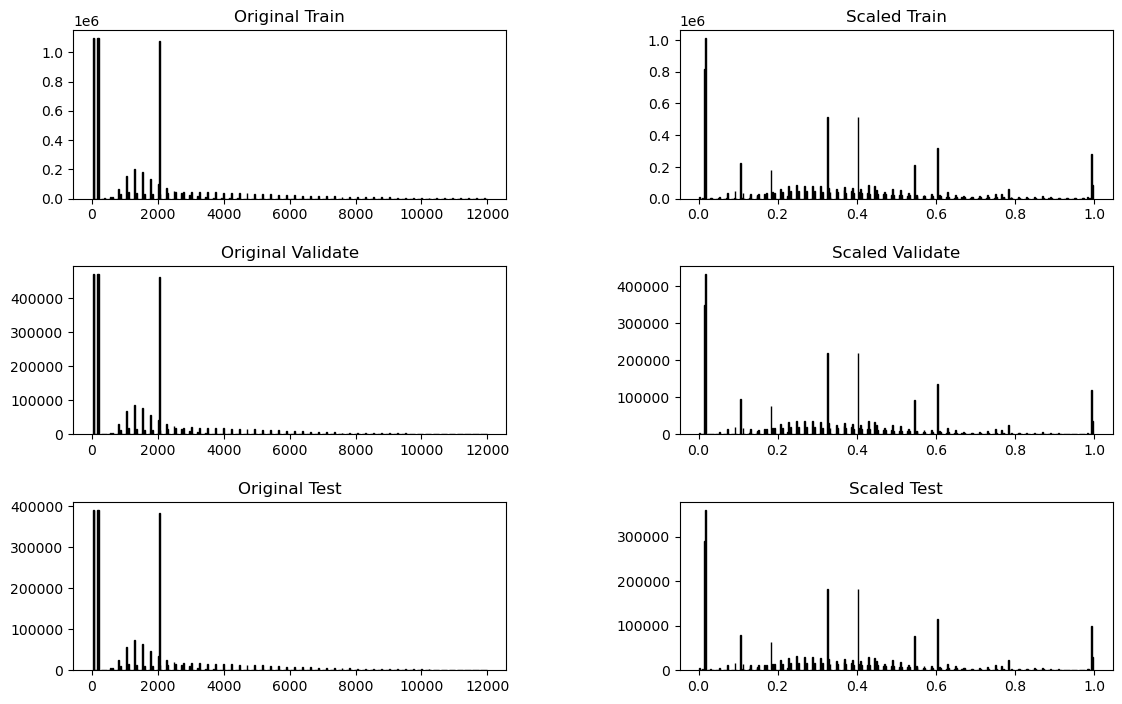

In [8]:
# scale data
X_train_scaled_mm, X_validate_scaled_mm, X_test_scaled_mm = wr.scale_zillow_2(X_train, X_validate, X_test)

<div class="alert alert-block alert-info"> 
    
## Regression Model:
    
#### Fit a linear regression model (ordinary least squares) and compute yhat, predictions of assessed_worth using only sqft.

Plot the residuals for the linear regression model that you made.

Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average taxvaluedollarcnt amount).

Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

What is the amount of variance explained in your model?

Is your model better than the baseline model?

Create a file named evaluate.py that contains the following functions.

* plot_residuals(y, yhat): creates a residual plot
* regression_errors(y, yhat): returns the following values:
    * sum of squared errors (SSE)
    * explained sum of squares (ESS)
    * total sum of squares (TSS)
    * mean squared error (MSE)
    * root mean squared error (RMSE)
* baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model
* better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false

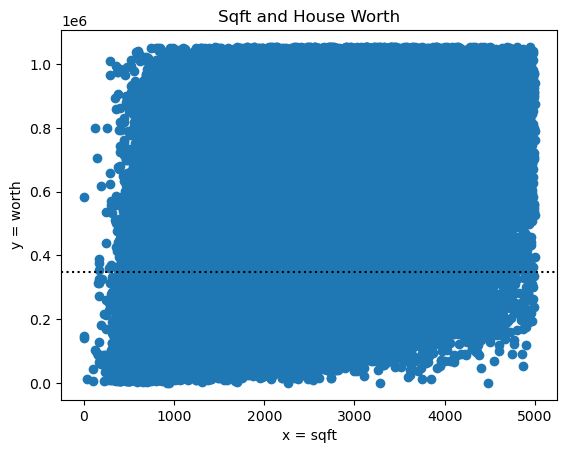

In [9]:
#plot our variables
plt.scatter(train.sqft, train.assessed_worth)

plt.xlabel('x = sqft')
plt.ylabel('y = worth')
plt.axhline(train.assessed_worth.mean(), ls=':', color='black')
plt.title(f"Sqft and House Worth")
plt.show()

In [10]:
# make the thing
model = LinearRegression()

# fit the thing
model = LinearRegression().fit(train[['sqft']], train[['assessed_worth']])

# use the thing
predictions = model.predict(train[['sqft']])
predictions

array([[320685.76712268],
       [283983.53059226],
       [513973.52806456],
       ...,
       [293279.29355629],
       [244556.67388272],
       [362997.51578657]])

In [11]:
# setting yhat baseline
train['yhat_baseline'] = train.assessed_worth.mean()
train.head()

,assessed_worth,bed,bath,sqft,year,property_taxes,orange,ventura,yhat_baseline
1954106,491421.0,3,2.0,1551.0,1950,6034.28,0,0,346887.717548
934733,54543.0,3,1.5,1322.0,1957,943.38,1,0,346887.717548
707024,740405.0,4,3.0,2757.0,1964,8794.01,0,0,346887.717548
1129674,224001.0,2,2.5,1430.0,1975,2216.12,1,0,346887.717548
458836,248200.0,3,1.0,1722.0,1947,3345.51,0,0,346887.717548


In [12]:
# setting yhat
train['yhat'] = predictions

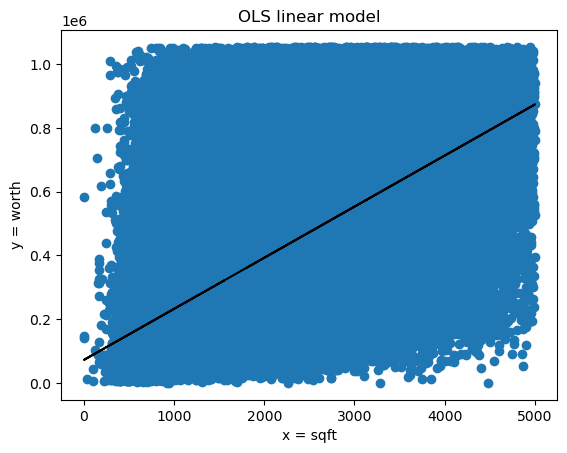

In [13]:
# visualize the line of best fit from OLS linear model

#scatter is my actuals
plt.scatter(train.sqft, train.assessed_worth)

#lineplot is my regression line
plt.plot(train.sqft, train.yhat, color='black')


plt.xlabel('x = sqft')
plt.ylabel('y = worth')
plt.title('OLS linear model')
plt.show()

### Regression Metrics

#### Vocabulary

Residual: error (change in actual and predicted) <br>
SSE: sum of squared error<br>
MSE: mean squared error<br>
RMSE: root mean squared error<br>

### Residual Error

In [14]:
# residual = actual - predicted
train['baseline_residual'] = train.assessed_worth - train.yhat_baseline
train.head()

,assessed_worth,bed,bath,sqft,year,property_taxes,orange,ventura,yhat_baseline,yhat,baseline_residual
1954106,491421.0,3,2.0,1551.0,1950,6034.28,0,0,346887.717548,320685.767123,144533.282452
934733,54543.0,3,1.5,1322.0,1957,943.38,1,0,346887.717548,283983.530592,-292344.717548
707024,740405.0,4,3.0,2757.0,1964,8794.01,0,0,346887.717548,513973.528065,393517.282452
1129674,224001.0,2,2.5,1430.0,1975,2216.12,1,0,346887.717548,301292.882318,-122886.717548
458836,248200.0,3,1.0,1722.0,1947,3345.51,0,0,346887.717548,348092.240689,-98687.717548


In [15]:
# residual = actual - predicted
train['residuals'] = train.assessed_worth - train.yhat
train.head()

,assessed_worth,bed,bath,sqft,year,property_taxes,orange,ventura,yhat_baseline,yhat,baseline_residual,residuals
1954106,491421.0,3,2.0,1551.0,1950,6034.28,0,0,346887.717548,320685.767123,144533.282452,170735.232877
934733,54543.0,3,1.5,1322.0,1957,943.38,1,0,346887.717548,283983.530592,-292344.717548,-229440.530592
707024,740405.0,4,3.0,2757.0,1964,8794.01,0,0,346887.717548,513973.528065,393517.282452,226431.471935
1129674,224001.0,2,2.5,1430.0,1975,2216.12,1,0,346887.717548,301292.882318,-122886.717548,-77291.882318
458836,248200.0,3,1.0,1722.0,1947,3345.51,0,0,346887.717548,348092.240689,-98687.717548,-99892.240689


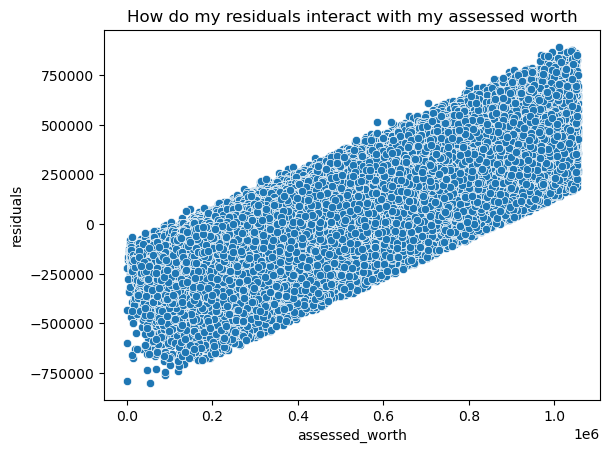

In [16]:
# plotting the residuals
sns.scatterplot(data=train, y='residuals', x='assessed_worth')
plt.title('How do my residuals interact with my assessed worth')
plt.show()

### SSE

In [17]:
# the difference between yhat and target, just squared
train['baseline_residual_2'] = train.baseline_residual ** 2
train['residual_2'] = train.residuals **2 
train.head()

,assessed_worth,bed,bath,sqft,year,property_taxes,orange,ventura,yhat_baseline,yhat,baseline_residual,residuals,baseline_residual_2,residual_2
1954106,491421.0,3,2.0,1551.0,1950,6034.28,0,0,346887.717548,320685.767123,144533.282452,170735.232877,2.088987e+10,2.915052e+10
934733,54543.0,3,1.5,1322.0,1957,943.38,1,0,346887.717548,283983.530592,-292344.717548,-229440.530592,8.546543e+10,5.264296e+10
707024,740405.0,4,3.0,2757.0,1964,8794.01,0,0,346887.717548,513973.528065,393517.282452,226431.471935,1.548559e+11,5.127121e+10
1129674,224001.0,2,2.5,1430.0,1975,2216.12,1,0,346887.717548,301292.882318,-122886.717548,-77291.882318,1.510115e+10,5.974035e+09
458836,248200.0,3,1.0,1722.0,1947,3345.51,0,0,346887.717548,348092.240689,-98687.717548,-99892.240689,9.739266e+09,9.978460e+09


### MSE

In [18]:
# add the residuals together
SSE_baseline = train.baseline_residual_2.sum()
SSE = train.residual_2.sum()
print("SSE_baseline =", "{:.1f}".format(SSE_baseline))
print('SSE =', "{:.1f}".format(SSE))

SSE_baseline = 52842865682402960.0
SSE = 40537110589389336.0


In [19]:
from sklearn.metrics import mean_squared_error
# shorthand
MSE = mean_squared_error(train.assessed_worth, train.yhat)
MSE

36970526889.80314

In [20]:
# shorthand
# dollars squared
SSE = MSE * len(train)
SSE

4.0537110589389336e+16

In [21]:
#calcaluate MSE
MSE_baseline = SSE_baseline/len(train)
MSE = SSE/len(train)

print(f"MSE baseline = {MSE_baseline:.1f}")
print(f'MSE = {MSE:.1f}')

MSE baseline = 48193582577.6
MSE = 36970526889.8


### RMSE

In [22]:
# calculate RMSE
RMSE_baseline = MSE_baseline ** .5
RMSE = MSE ** .5

print("RMSE baseline = ", "{:.2f}".format(RMSE_baseline))
print("RMSE = ", "{:.2f}".format(RMSE))

RMSE baseline =  219530.37
RMSE =  192277.21


In [23]:
# shorthand
# How much error we have in one housing price!
RMSE = MSE ** .5
RMSE.round(2)

192277.21

### ESS

Used with TSS as another way to calculate R2

In [24]:
ESS = sum((train.yhat - train.assessed_worth.mean())**2)
ESS

1.2305755093012246e+16

In [25]:
TSS = ESS + SSE
TSS

5.284286568240158e+16

In [26]:
# another way to calculate R2
(ESS/TSS).round(4)

0.2329

In [27]:
# testing against baseline
MSE_baseline = mean_squared_error(train.assessed_worth, train.yhat_baseline)
MSE_baseline

48193582577.56289

In [28]:
# testing against baseline
SSE_baseline = MSE_baseline * len(train)
SSE_baseline

5.284286568240296e+16

In [29]:
# testing against baseline
RMSE_baseline = MSE_baseline ** .5
RMSE_baseline.round(2)

219530.37

### Variance

### R2

In [30]:
# use r2_score
round(r2_score(train.assessed_worth, train.yhat),4)

0.2329

### Is my model better than the baseline model?

My model is better than baseline, however, it's not that great.

better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false

### Python Code

In [31]:
ev.better_than_baseline(SSE, SSE_baseline)

True